In [1]:
#Import relevant packages
import matplotlib.pyplot as plt
import math
import numpy as np
import glob
plt.style.use('classic')
#%matplotlib inline
from matplotlib import cm


In [2]:
#Set parameters
nodes=[309]#note that this is the total number of addresses in the ieee dataset
nodes1=[309] #this is the number of nodes in the mfg graph
marker_colors=['r', 'b', 'g','y', 'm','c','k','plum','lime','orange','crimson']
markers=['s','D','8','v','*','^','<','+']


### Matjaz Compare to analytic

In [3]:
files=glob.glob("da-cunha-matjaz/Exchange_dist_309*perc*")
perc_val_dists={perc:{} for perc in range(0,11,2)}
for f in files:
    node=int(f.split('node')[1].split('_')[0])
    perc=int(f.split('perc')[1].split('_')[0])
    filename=open(f)
    for line in filename.readlines():
        if len(line.split())>1:
            dval=line.split()[1]
            seeknode=int(line.split()[0])
            perc_val_dists[perc][(node, seeknode)]=int(dval)


0 0 0.0 0.0
2 402 0.2 404.40000000000003
4 821 0.4 808.8000000000001
6 1219 0.6 1213.2
8 1609 0.8 1617.6000000000001
10 2022 1.0 2022.0
0 0 0.0 0.0
2 374 0.04000000000000001 294.28000000000003
4 1306 0.16000000000000003 1177.1200000000001
6 2805 0.36 2648.52
8 5023 0.6400000000000001 4708.4800000000005
10 7357 1.0 7357.0
0 0 0.0 0.0
2 212 0.008000000000000002 91.73600000000002
4 1376 0.06400000000000002 733.8880000000001
6 3821 0.21599999999999997 2476.872
8 7622 0.5120000000000001 5871.104000000001
10 11467 1.0 11467.0
0 0 0.0 0.0
2 39 0.0016000000000000003 12.028800000000002
4 582 0.025600000000000005 192.46080000000003
6 2239 0.1296 974.3327999999999
8 4632 0.4096000000000001 3079.3728000000006
10 7518 1.0 7518.0


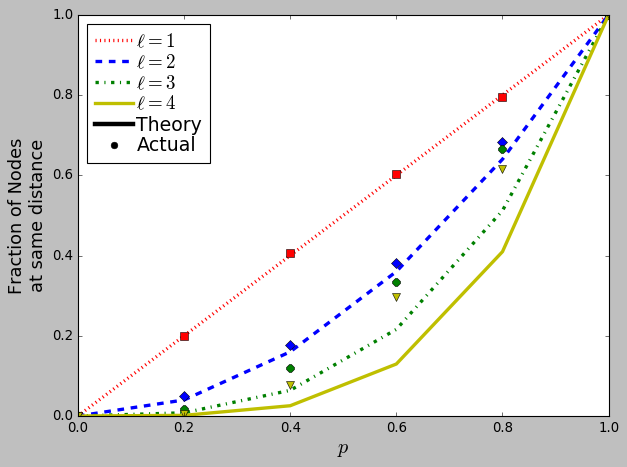

In [64]:
markers=['s','D','8','v','*','^','<','+']
linestyles=['dotted','dashed','dashdot','-']
for distval in range(1,5):
    have_distx=[pair[0] for pair in perc_val_dists[10].items() if pair[1]==distval]
    predicted_same_dist=[]
    actual_same_dist=[]
    for perc_val in range(0,11,2):
        same_dist=[key for key in have_distx if perc_val_dists[perc_val][key]==distval]
        print(perc_val, len(same_dist), (perc_val/10)**distval,(perc_val/10)**distval*len(have_distx))
        actual_same_dist.append(len(same_dist))
        predicted_same_dist.append((perc_val/10)**distval*len(have_distx))
    perc_vals=[p/10 for p in range(0,11,2)]
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    maxval_pred=predicted_same_dist[0]
    predicted_same_dist=[v/maxval_pred for v in predicted_same_dist]
    make_val_act=actual_same_dist[0]
    actual_same_dist=[v/make_val_act for v in actual_same_dist]
    
    #flip order to make p go from 0 to 1
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    
    
    plt.plot(perc_vals, predicted_same_dist, color=marker_colors[distval-1], ls=linestyles[distval-1], lw=3, label='$\ell=%d$' % (distval))
    plt.plot(perc_vals, actual_same_dist, 'o',color=marker_colors[distval-1], marker=markers[distval-1], ms=7)
plt.plot([],[], color='k', lw=4, label='Theory')
plt.plot([],[], 'o', color='k', lw=4, label='Actual')

plt.xlabel('$p$', fontsize=18)
plt.xticks(perc_vals, fontsize=12)    
plt.ylabel('Fraction of Nodes\nat same distance', fontsize=16)
plt.yticks(fontsize=12)    
plt.legend(loc='upper left', borderpad=0.4,numpoints=1,handletextpad=0.2, columnspacing=0.2, labelspacing=0.1, frameon=True, ncol=1, prop={'size':17})
plt.tight_layout()
plt.savefig('matjaz_num_nodes_reachable_at_same_dist_estimate_170423.pdf')

plt.show()

0 0 0.0
2 970 202.2040354301664
4 1114 484.2881416364778
6 784 302.03682864209753
8 412 82.35686952859777
10 0 0.0
0 0 0.0
2 1071 26.79099240565463
4 3903 814.4387576907029
6 5284 2198.5199116689164
8 3382 1298.008230271306
10 0 0.0
0 0 0.0
2 282 1.8811229028060024
4 1865 207.55702903314184
6 3117 1037.514998436338
8 2421 991.1225469700238
10 0 0.0


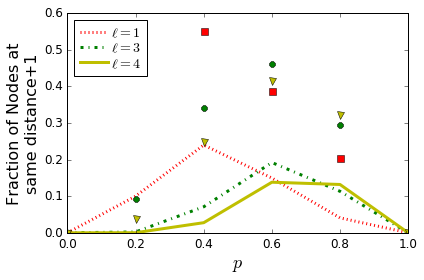

In [4]:
markers=['s','D','8','v','*','^','<','+']
linestyles=['dotted','','dashdot','-']
cell_text=[]
for distval in [1,3,4]:#range(1,5):
    have_distx=[pair[0] for pair in perc_val_dists[10].items() if pair[1]==distval]
    predicted_same_dist=[]
    actual_same_dist=[]
    for perc_val in range(0,11,2):
        same_dist=[key for key in have_distx if perc_val_dists[perc_val][key]==distval+1]
        pval=perc_val/10
        ell=distval
        print(perc_val, len(same_dist), len(same_dist)*ell*pval**(ell-1)*(1-pval)*(1-(1-pval**2)**(0.85*(9.7-1))))
        actual_same_dist.append(len(same_dist))
        predicted_same_dist.append(len(same_dist)*ell*pval**(ell-1)*(1-pval)*(1-(1-pval**2)**(0.85*(9.7-1))))

    perc_vals=[p/10 for p in range(0,11,2)]
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    maxval_pred=len(have_distx)
    predicted_same_dist=[v/maxval_pred for v in predicted_same_dist]
    make_val_act=len(have_distx)
    actual_same_dist=[v/make_val_act for v in actual_same_dist]
    
    #flip order to make p go from 0 to 1
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    
    plt.plot(perc_vals, predicted_same_dist, color=marker_colors[distval-1], lw=3,ls=linestyles[distval-1], label='$\ell=%d$' % (distval))
    plt.plot(perc_vals, actual_same_dist, 'o',color=marker_colors[distval-1],marker=markers[distval-1],ms=7)
    cell_text.append(['$%d$' % distval, '-', markers[distval-1]])
#plt.plot([],[], color='k', lw=4, label='Theory')
#plt.plot([],[], 'o', color='k', lw=4, label='Actual')

plt.xlabel('$p$', fontsize=18)
plt.xticks(perc_vals, fontsize=12)    
plt.ylabel('Fraction of Nodes at\nsame distance+1', fontsize=16)
plt.yticks(fontsize=12)    

plt.legend(loc='upper left', borderpad=0.4,numpoints=1,handletextpad=0.2, columnspacing=0.2, labelspacing=0.1, frameon=True, ncol=1, prop={'size':14})

plt.tight_layout()
plt.savefig('matjaz_num_nodes_reachable_at_same_dist_plus1_estimate_170423.pdf')
plt.show()

In [66]:
(1-(1-0.2**2)**(0.85*9.7))

0.2857893590532984

# CDF

100
2
[(0, 0.003236245954692557), (1, 0.016245954692556634), (2, 0.0597411003236246), (3, 0.12834951456310678), (4, 0.2263430420711974), (5, 0.3329449838187702), (6, 0.612168284789644)]
100
4
[(0, 0.003236245954692557), (1, 0.02980582524271845), (2, 0.1081229773462783), (3, 0.2607443365695793), (4, 0.4722330097087378), (5, 0.6613268608414239), (6, 0.8926860841423947)]
100
6
[(0, 0.003236245954692557), (1, 0.04268608414239482), (2, 0.15883495145631069), (3, 0.39789644012944986), (4, 0.669967637540453), (5, 0.8511974110032362), (6, 0.97084142394822)]
100
8
[(0, 0.003236245954692557), (1, 0.05530744336569579), (2, 0.23119741100323624), (3, 0.5470873786407767), (4, 0.8120388349514563), (5, 0.9452103559870549), (6, 0.9960517799352749)]
100
10
[(0, 0.003236245954692557), (1, 0.06867313915857605), (2, 0.3067637540453074), (3, 0.6778640776699029), (4, 0.9211650485436893), (5, 0.9922653721682848), (6, 1.0)]


<Figure size 640x480 with 0 Axes>

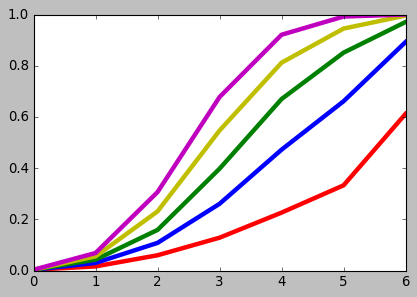

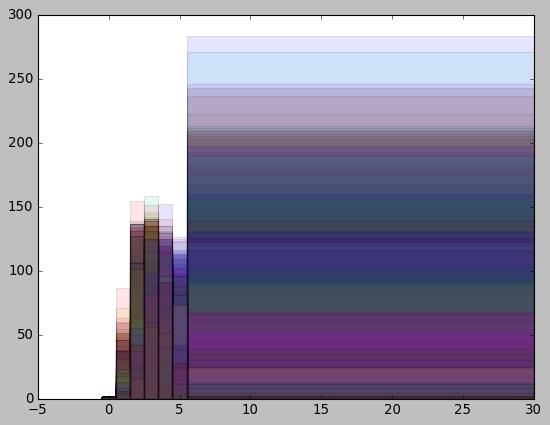

In [67]:
# read in and plot from the files
plt.clf()
runs=1
pvals=range(2,11,2)
fig, ax=plt.subplots(figsize=(6,4))
fig1, ax1=plt.subplots()
max_length=6

cm_subsection = np.linspace(0.2, 1, 5) 
colors = [ cm.Reds(x) for x in cm_subsection ]

for ii,p in enumerate(pvals):
    bins=list(range(max_length))
    bins.append(max_length)
    n=[]
    files=glob.glob("da-cunha-matjaz/Exchange_dist_309*perc%d_*" % p)
    print(len(files))
    for filestring in files:
        #print(filestring)
        filename=open(filestring)
        distances=[]
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                distances.append(int(dval))
        bins1=[-0.5+x for x in range(max_length+1)]
        bins1.append(30)
        n_run,bins_run,patches=ax1.hist(distances, bins=bins1, alpha=0.1)
        #bins_run=[(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]  
        n.append(n_run)
    n=np.array(n)
    n_final=np.average(n, axis=0)
    n_cumsum=np.cumsum(n_final)
    n_cumsum=n_cumsum/nodes[0]
    ax.plot(bins, n_cumsum, color=marker_colors[ii], lw=4, label=r"$p=$%.1f" % (float(p)/(max(pvals))))
    #plt.errorbar(p_run[::3], gcc_avg[::3], yerr=gcc_std[::3], linestyle='-', color=marker_colors[x], label=("" ), marker=markers[x] )
    print(p)
    print(list(zip(bins,n_cumsum)))

In [68]:
#ax.legend(loc=(0.03,0.77), borderpad=0.1,numpoints=1,handletextpad=0.2, columnspacing=0.4, frameon=False, ncol=2, prop={'size':16})
ax.set_xticks(list(range(1,max_length+1)))
ax.set_xlim(left=1, right=max_length)
xticklabels=[str(x) for x in range(1,max_length)]
xticklabels.append(">%d" % max_length)
ax.set_xticklabels(xticklabels)
ax.set_ylim(bottom=0., top=1.0)
ax.set_yticks(np.array(range(0,11,2))/10.)

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.yaxis.set_ticks_position('left')
#ax.xaxis.set_ticks_position('bottom')

#ax.text(1.34,0.84,"Conspiracy",fontsize=18, fontweight='bold')
ax.tick_params(axis='both',labelsize=20)
#ax.set_ylim(bottom=10**4, top=10**6)
ax.set_xlabel(r"$l$", fontsize=48)
ax.set_ylabel(r"$S_l$", fontsize=48)
fig.tight_layout()
#fig.savefig("paths_cumulative_matjaz_all.pdf")
plt.show()

# PDF 

100
2
100
4
100
6
100
8
100
10


<Figure size 640x480 with 0 Axes>

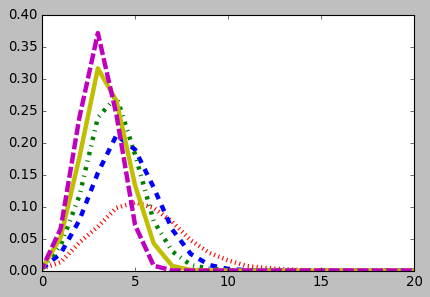

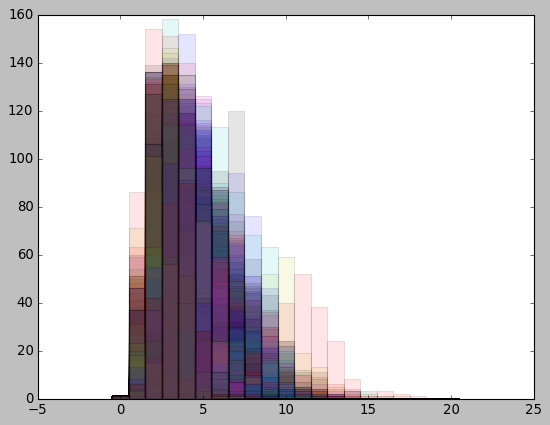

In [71]:
# read in and plot from the files
linestyles=['dotted','dashed','dashdot','-', (5,(10,3))]
plt.clf()
runs=1
pvals=range(2,11,2)
fig, ax=plt.subplots(figsize=(6,4))
fig1, ax1=plt.subplots()
max_length=20

cm_subsection = np.linspace(0.2, 1, 5) 
colors = [ cm.Reds(x) for x in cm_subsection ]

for ii,p in enumerate(pvals):
    bins=list(range(max_length))
    bins.append(max_length)
    n=[]
    files=glob.glob("da-cunha-matjaz/Exchange_dist_309*perc%d_*" % p)
    print(len(files))
    for filestring in files:
        #print(filestring)
        filename=open(filestring)
        distances=[]
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                distances.append(int(dval))
        bins1=[-0.5+x for x in range(max_length+2)]
        #bins1.append(30)
        n_run,bins_run,patches=ax1.hist(distances, bins=bins1, alpha=0.1)
        #bins_run=[(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]  
        n.append(n_run)
    n=np.array(n)
    n_final=np.average(n, axis=0)
    '''n_cumsum=np.cumsum(n_final)
    n_cumsum=n_cumsum/nodes[0]'''
    n_final=n_final/nodes[0]
    ax.plot(bins, n_final, color=marker_colors[ii],ls=linestyles[ii], lw=4, label=r"$p=$%.1f" % (float(p)/(max(pvals))))
    #plt.errorbar(p_run[::3], gcc_avg[::3], yerr=gcc_std[::3], linestyle='-', color=marker_colors[x], label=("" ), marker=markers[x] )
    print(p)
    #print(list(zip(bins,n_cumsum)))

In [72]:
#ax.legend(loc=(0.03,0.77), borderpad=0.1,numpoints=1,handletextpad=0.2, columnspacing=0.4, frameon=False, ncol=2, prop={'size':16})
ax.set_xticks([1,5,10,15])
ax.set_xlim(left=1, right=15)
xticklabels=[1,5,10,15]
#xticklabels.append(">%d" % max_length)
ax.set_xticklabels(xticklabels)
ax.set_yticks(np.array(range(0,11,2))/10.)

#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.yaxis.set_ticks_position('left')
#ax.xaxis.set_ticks_position('bottom')
ax.set_ylim(bottom=0., top=0.45)
ax.set_xlim(0,11)

#ax.text(1.34,0.84,"Conspiracy",fontsize=18, fontweight='bold')
ax.tick_params(axis='both',labelsize=20)
#ax.set_ylim(bottom=10**4, top=10**6)
ax.set_xlabel(r"$l$", fontsize=48)
ax.set_ylabel(r"$F_l$", fontsize=48)
fig.tight_layout()
fig.savefig("paths_pdf_matjaz_all_170423.pdf")
plt.show()

In [5]:
files=glob.glob("da-cunha-matjaz/Exchange_dist_309*perc10_*")


In [6]:
nodes_order=[]
for f in files:
    run=f.split("__")[1].split('.')[0]
    node=f.split("node")[1].split("__")[0]
    nodes_order.append((int(run),int(node)))
_,nodes=zip(*sorted(nodes_order))
print(nodes)

(292, 104, 37, 158, 91, 212, 145, 78, 199, 132, 253, 186, 307, 240, 52, 294, 106, 39, 281, 93, 26, 147, 80, 201, 134, 255, 188, 0, 242, 54, 296, 229, 41, 283, 95, 28, 149, 82, 203, 136, 257, 190, 2, 244, 177, 298, 231, 43, 285, 97, 30, 272, 84, 17, 138, 71, 4, 125, 58, 179, 112, 45, 166, 99, 220, 153, 274, 207, 140, 261, 194, 6, 248, 60, 302, 114, 47, 289, 101, 34, 155, 88, 209, 142, 75, 196, 129, 250, 183, 304, 237, 49, 291, 224, 36, 278, 90, 23, 144, 77)


# Da Cunha

In [8]:
#Set parameters
nodes=[10407]#note that this is the total number of addresses in the ieee dataset
nodes1=[10407] #this is the number of nodes in the mfg graph
marker_colors=['orange','c','plum','r', 'b', 'm','k','lime','crimson']
markers=['s','D','8','v','*','^','<','+']


# CDF

da-cunha-matjaz/da-cunha/Exchange_dist_10407_perc0.2_dacunha_linkperc_no_count_exchange_node3208__31.txt 0.2
0.2
[(0, 9.608917075045643e-05), (1, 0.00030844623810896514), (2, 0.008485634668972805), (3, 0.05486499471509561), (4, 0.24099836648409723), (5, 0.28925819160180644), (6, 0.29602190833093106)]
da-cunha-matjaz/da-cunha/Exchange_dist_10407_perc0.5_dacunha_linkperc_no_count_exchange_node1630__96.txt 0.5
0.5
[(0, 9.608917075045643e-05), (1, 0.000643797444028058), (2, 0.04817911021427885), (3, 0.2773892572307101), (4, 0.5340597674642068), (5, 0.5428980493898338), (6, 0.542955702892284)]
da-cunha-matjaz/da-cunha/Exchange_dist_10407_perc1_dacunha_linkperc_no_count_exchange_node3858__56.txt 1
1
[(0, 9.608917075045643e-05), (1, 0.0012164889017007784), (2, 0.15182088978572114), (3, 0.5649649274526761), (4, 0.7403968482751995), (5, 0.7413221869895263), (6, 0.7413221869895263)]
da-cunha-matjaz/da-cunha/Exchange_dist_10407_perc2_dacunha_linkperc_no_count_exchange_node7577__57.txt 2
2
[(0, 9.

<Figure size 432x288 with 0 Axes>

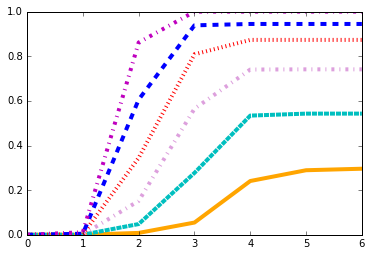

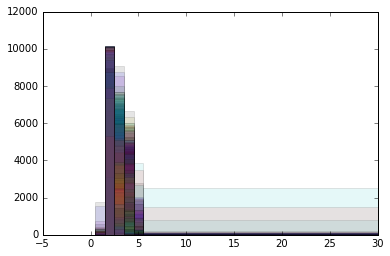

In [9]:
# read in and plot from the files
linestyles=['-',(0,(5,1)),'dashdot', 'dotted','dashed','dashdot','-', (5,(10,3))]

plt.clf()
runs=1
#pvals=range(2,11,2)
pvals=[0.2, 0.5,1,2,4,10]
fig, ax=plt.subplots(figsize=(6,4))
fig1, ax1=plt.subplots()
max_length=6
cm_subsection = np.linspace(0.2, 1, 5) 
colors = [ cm.Blues(x) for x in cm_subsection ]

for ii,p in enumerate(pvals):
    bins=list(range(max_length))
    bins.append(max_length)
    n=[]
    if p>=1:
        files=glob.glob("da-cunha-matjaz/da-cunha/Exchange_dist*perc%d_*" % p)
    else:
        files=glob.glob("da-cunha-matjaz/da-cunha/Exchange_dist*perc%.1f_*" % p)
        
    print(files[0],p)
    for filestring in files:
        filename=open(filestring)
        distances=[]
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                distances.append(int(dval))
        bins1=[-0.5+x for x in range(max_length+1)]
        bins1.append(30)
        n_run,bins_run,patches=ax1.hist(distances, bins=bins1, alpha=0.1)
        #bins_run=[(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]  
        n.append(n_run)
    n=np.array(n)
    n_final=np.average(n, axis=0)
    n_cumsum=np.cumsum(n_final)
    n_cumsum=n_cumsum/nodes[0]
    if p>=1:
        thislabel=r"$p=$%.1f" % (float(p)/(max(pvals)))
    else:
        thislabel=r"$p=$%.2f" % (float(p)/(max(pvals)))
    ax.plot(bins, n_cumsum, color=marker_colors[ii],ls=linestyles[ii], lw=4, label=thislabel)
    #plt.errorbar(p_run[::3], gcc_avg[::3], yerr=gcc_std[::3], linestyle='-', color=marker_colors[x], label=("" ), marker=markers[x] )
    print(p)
    print(list(zip(bins,n_cumsum)))

In [78]:
#ax.legend(loc=(0.,0.02), borderpad=0.1,numpoints=1,handletextpad=0.2, columnspacing=0.4, frameon=False, ncol=2, prop={'size':16})
ax.set_xticks(list(range(1,max_length+1)))
ax.set_xlim(left=1, right=max_length)
xticklabels=[str(x) for x in range(1,max_length)]
xticklabels.append(">%d" % max_length)
ax.set_xticklabels(xticklabels)
ax.set_ylim(bottom=0.)
ax.set_yticks(np.array(range(0,11,2))/10.)

'''ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')'''

#ax.text(4.04,0.62,"Dark Web",fontsize=18, fontweight='bold')
ax.tick_params(axis='both',labelsize=20)
#ax.set_ylim(bottom=10**4, top=10**6)
ax.set_xlabel(r"$l$", fontsize=48)
ax.set_ylabel(r"$S_l$", fontsize=48)
fig.tight_layout()
plt.show()
fig.savefig("paths_cumulative_dacunha_all-extrap_170423.pdf")

### Da Cunha Compare to analytic

In [14]:
files=glob.glob("da-cunha-matjaz/da-cunha/Exchange_dist_10407*perc*")
perc_val_dists={perc:{} for perc in [0.2, 0.5,1,2,4,10]}
for f in files:
    node=int(f.split('node')[1].split('_')[0])
    perc=float(f.split('perc')[1].split('_')[0])
    if perc in perc_val_dists:
        filename=open(f)
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                seeknode=int(line.split()[0])
                perc_val_dists[perc][(node, seeknode)]=int(dval)


0.2 221 0.02 237.52
0.5 570 0.05 593.8000000000001
1 1166 0.1 1187.6000000000001
2 2401 0.2 2375.2000000000003
4 4758 0.4 4750.400000000001
10 11876 1.0 11876.0
[0.02, 0.05, 0.1, 0.2, 0.4, 1.0]
0.2 7846 0.0004 353.8576
0.5 46452 0.0025000000000000005 2211.6100000000006
1 149567 0.010000000000000002 8846.440000000002
2 347660 0.04000000000000001 35385.76000000001
4 618529 0.16000000000000003 141543.04000000004
10 884644 1.0 884644.0
[0.00039999999999999996, 0.0025000000000000005, 0.010000000000000002, 0.04000000000000001, 0.16000000000000003, 1.0]
0.2 98 8.000000000000001e-06 1.1516880000000003
0.5 2218 0.00012500000000000003 17.995125000000005
1 14024 0.0010000000000000002 143.96100000000004
2 57044 0.008000000000000002 1151.6880000000003
4 110388 0.06400000000000002 9213.504000000003
10 143961 1.0 143961.0
[8.000000000000001e-06, 0.00012500000000000003, 0.0010000000000000002, 0.008000000000000002, 0.06400000000000002, 1.0]
0.2 0 1.6e-07 1.904e-05
0.5 1 6.250000000000001e-06 0.00074375

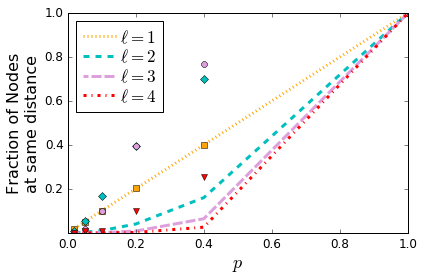

In [12]:
markers=['s','D','8','v','*','^','<','+']
linestyles=['dotted','dashed',(5,(10,3)),'dashdot','-']

perc_vals=[0.2, 0.5,1,2,4,10]
for distval in range(1,5):
    have_distx=[pair[0] for pair in perc_val_dists[10].items() if pair[1]==distval]
    predicted_same_dist=[]
    actual_same_dist=[]
    for perc_val in [0.2, 0.5,1,2,4,10]:
        same_dist=[key for key in have_distx if perc_val_dists[perc_val][key]==distval]
        print(perc_val, len(same_dist), (perc_val/10)**distval,(perc_val/10)**distval*len(have_distx))
        actual_same_dist.append(len(same_dist))
        predicted_same_dist.append((perc_val/10)**distval*len(have_distx))
    perc_vals=[p/10 for p in [0.2, 0.5,1,2,4,10]]
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    maxval_pred=len(have_distx)
    predicted_same_dist=[v/maxval_pred for v in predicted_same_dist]
    make_val_act=len(have_distx)
    actual_same_dist=[v/make_val_act for v in actual_same_dist]
    
    #flip order to make p go from 0 to 1
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    
    plt.plot(perc_vals, predicted_same_dist, color=marker_colors[distval-1], lw=3,ls=linestyles[distval-1], label='$\ell=%d$' % (distval))
    plt.plot(perc_vals, actual_same_dist, 'o',color=marker_colors[distval-1], marker=markers[distval-1])
    print(predicted_same_dist)
#plt.plot([],[], color='k', lw=4, label='Theory')
#plt.plot([],[], 'o', color='k', lw=4, label='Actual')

plt.xlabel('$p$', fontsize=18)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0],fontsize=12)    
plt.ylabel('Fraction of Nodes\nat same distance', fontsize=16)
plt.yticks(fontsize=12)    
plt.ylim(10**-4,1)
plt.legend(loc='upper left', borderpad=0.4,numpoints=1,handletextpad=0.2, columnspacing=0.2, labelspacing=0.1, frameon=True, ncol=1, prop={'size':17})
plt.tight_layout()
plt.savefig('dacunha_num_nodes_reachable_at_same_dist_estimate_170423.pdf')

plt.show()

0.2 664 31.412730628911202
0.5 3018 763.3132148512149
1 7167 4589.136915860137
2 8735 6943.142373935476
4 7042 4225.199998174144
10 0 0.0
1 [0.0026450598373956888, 0.06427359505315046, 0.38642109429607086, 0.584636441052162, 0.35577635552156817, 0.0]
0.2 41584 78.69078255859299
0.5 228683 5783.855398005977
1 412511 52827.388260035754
2 424944 135109.17884142586
4 235738 113154.2399511021
10 0 0.0
2 [8.895192027368409e-05, 0.0065380598274627725, 0.05971598548120572, 0.1527271748199568, 0.1279093510509336, 0.0]
0.2 1784 0.10127767128068238
0.5 19427 36.851107914797595
1 36294 697.1876736049722
2 33591 3204.0356563187174
4 5275 1519.1999993435008
10 0 0.0
3 [7.035076950054694e-07, 0.0002559797994929015, 0.004842892683469636, 0.02225627535456629, 0.010552858061165878, 0.0]


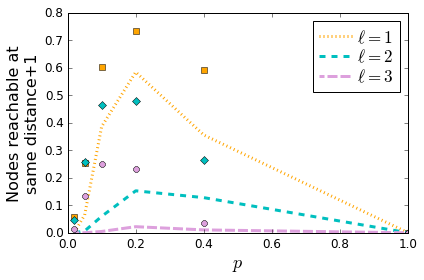

In [19]:
linestyles=['dotted','dashed',(5,(10,3)),'dashdot','-']

for distval in [1,2,3]:#range(1,5):
    have_distx=[pair[0] for pair in perc_val_dists[10].items() if pair[1]==distval]
    predicted_same_dist=[]
    actual_same_dist=[]
    for perc_val in [0.2, 0.5,1,2,4,10]:
        same_dist=[key for key in have_distx if perc_val_dists[perc_val][key]==distval+1]
        pval=perc_val/10
        ell=distval
        print(perc_val, len(same_dist), len(same_dist)*ell*pval**(ell-1)*(1-pval)*(1-(1-pval**2)**(0.83*(150-1))))
        actual_same_dist.append(len(same_dist))
        predicted_same_dist.append(len(same_dist)*ell*pval**(ell-1)*(1-pval)*(1-(1-pval**2)**(0.83*(150-1))))

    perc_vals=[p/10 for p in [0.2, 0.5,1,2,4,10]]
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    maxval_pred=len(have_distx)
    predicted_same_dist=[v/maxval_pred for v in predicted_same_dist]
    make_val_act=len(have_distx)
    actual_same_dist=[v/make_val_act for v in actual_same_dist]
    
    #flip order to make p go from 0 to 1
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    #perc_vals.reverse()
    print(distval,predicted_same_dist)
    plt.plot(perc_vals, predicted_same_dist, color=marker_colors[distval-1], lw=3,ls=linestyles[distval-1], label='$\ell=%d$' % (distval))
    plt.plot(perc_vals, actual_same_dist, 'o',color=marker_colors[distval-1],  marker=markers[distval-1])
#plt.plot([],[], color='k', lw=4, label='Theory')
#plt.plot([],[], 'o', color='k', lw=4, label='Actual')

plt.xlabel('$p$', fontsize=18)
plt.xticks([0,0.2,0.4,0.6,0.8,1], fontsize=12)    
plt.ylabel('Nodes reachable at\nsame distance+1', fontsize=16)
plt.yticks(fontsize=12)    

plt.legend(loc='upper right', borderpad=0.4,numpoints=1,handletextpad=0.2, columnspacing=0.2, labelspacing=0.1, frameon=True, ncol=1, prop={'size':17})
plt.tight_layout()
plt.savefig('dacunha_num_nodes_reachable_at_same_dist_plus1_estimate_170423.pdf')
plt.show()

# PDF

da-cunha-matjaz/da-cunha/Exchange_dist_10407_perc0.2_dacunha_linkperc_no_count_exchange_node3208__31.txt 0.2
0.2
[(0, 9.608917075045643e-05), (1, 0.0002123570673585087), (2, 0.008177188430863841), (3, 0.0463793600461228), (4, 0.18613337176900163), (5, 0.04825982511770924), (6, 0.006586912654943788), (7, 0.0001662342653982896), (8, 1.0569808782550206e-05), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0)]
da-cunha-matjaz/da-cunha/Exchange_dist_10407_perc0.5_dacunha_linkperc_no_count_exchange_node1630__96.txt 0.5
0.5
[(0, 9.608917075045643e-05), (1, 0.0005477082732776017), (2, 0.04753531277025079), (3, 0.22921014701643125), (4, 0.2566705102334967), (5, 0.008838281925626983), (6, 5.765350245027385e-05), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0)]
da-cunha-matjaz/da-cunha/Exchange_dist_10407_perc1_dacunha_linkperc_no_count_exchange_node3858__56.txt 1
1
[(0, 9.608917075045643e-05), (1, 0.001120399730950322), (2, 0

<Figure size 640x480 with 0 Axes>

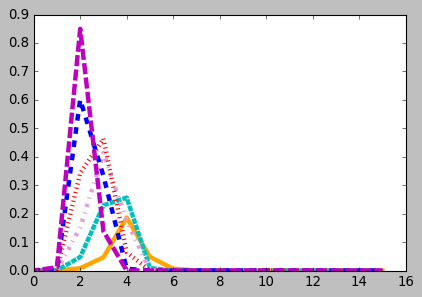

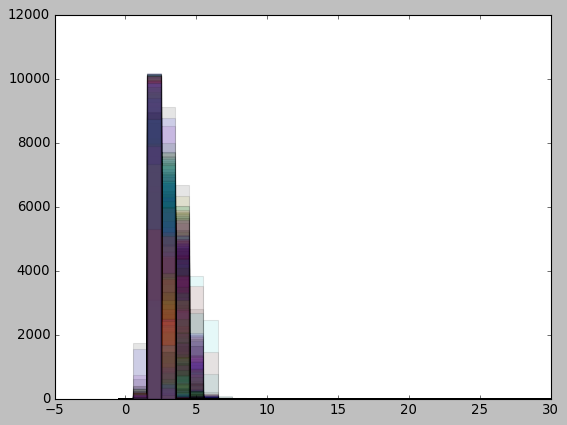

In [99]:
#linestyles=['dotted','dashed','dashdot','-', (5,(10,3))]

linestyles=['-',(0,(5,1)),'dashdot', 'dotted','dashed', (5,(10,3))]

# read in and plot from the files
plt.clf()
runs=1
#pvals=range(2,11,2)
pvals=[0.2, 0.5,1,2,4,10]
fig, ax=plt.subplots(figsize=(6,4))
fig1, ax1=plt.subplots()
max_length=15
cm_subsection = np.linspace(0.2, 1, 5) 
colors = [ cm.Blues(x) for x in cm_subsection ]

for ii,p in enumerate(pvals):
    bins=list(range(max_length))
    bins.append(max_length)
    n=[]
    if p>=1:
        files=glob.glob("da-cunha-matjaz/da-cunha/Exchange_dist*perc%d_*" % p)
    else:
        files=glob.glob("da-cunha-matjaz/da-cunha/Exchange_dist*perc%.1f_*" % p)
        
    print(files[0],p)
    for filestring in files:
        filename=open(filestring)
        distances=[]
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                distances.append(int(dval))
        bins1=[-0.5+x for x in range(max_length+1)]
        bins1.append(30)
        n_run,bins_run,patches=ax1.hist(distances, bins=bins1, alpha=0.1)
        #bins_run=[(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]  
        n.append(n_run)
    n=np.array(n)
    n_final=np.average(n, axis=0)
    #n_cumsum=np.cumsum(n_final)
    n_final=n_final/nodes[0]
    if p>=1:
        thislabel=r"$p=$%.1f" % (float(p)/(max(pvals)))
    else:
        thislabel=r"$p=$%.2f" % (float(p)/(max(pvals)))
    ax.plot(bins, n_final, color=marker_colors[ii],lw=4, ls=linestyles[ii], label=thislabel)
    #plt.errorbar(p_run[::3], gcc_avg[::3], yerr=gcc_std[::3], linestyle='-', color=marker_colors[x], label=("" ), marker=markers[x] )
    print(p)
    print(list(zip(bins,n_final)))

In [100]:
#ax.legend(loc=(0.,0.02), borderpad=0.1,numpoints=1,handletextpad=0.2, columnspacing=0.4, frameon=False, ncol=2, prop={'size':16})
ax.set_xticks(list(range(1,max_length+1)))
xticklabels=[1,5,10]
#xticklabels.append(">%d" % max_length)
ax.set_xticks(xticklabels)
ax.set_xticklabels(xticklabels)
ax.set_ylim(bottom=0.)
ax.set_yticks(np.array(range(0,11,2))/10.)

'''ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')'''
ax.set_xlim(left=1, right=10)
#ax.text(4.04,0.62,"Dark Web",fontsize=18, fontweight='bold')
ax.tick_params(axis='both',labelsize=20)
#ax.set_ylim(bottom=10**4, top=10**6)
ax.set_xlabel(r"$l$", fontsize=48)
ax.set_ylabel(r"$F_l$", fontsize=48)
fig.tight_layout()
plt.show()
fig.savefig("paths_pdf_dacunha_all-extrap_170423.pdf")

# Ethereum

In [79]:
#Set parameters
nodes=[2721080]#note that this is the total number of addresses in the ieee dataset
nodes1=[2721080] #this is the number of nodes in the mfg graph
marker_colors=['orange','c','plum','r','b','g','y', 'm','k','lime','crimson']
markers=['s','D','8','v','*','^','<','+']
linestyles=['-',(0,(5,1)),'dashdot', 'dotted','dashed','dashdot','-', (5,(10,3))]


# CDF

100 2
2 0
2 1
2
[(0, 2.9400091140282537e-06), (1, 0.2183496993840681), (2, 0.28266037749717027), (3, 0.37122227203904334), (4, 0.3987278948064739), (5, 0.41584297411321974), (6, 0.42918620547723696)]
100 4
4 0


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

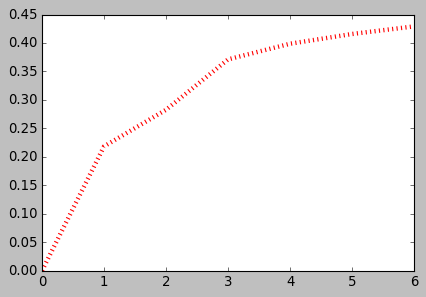

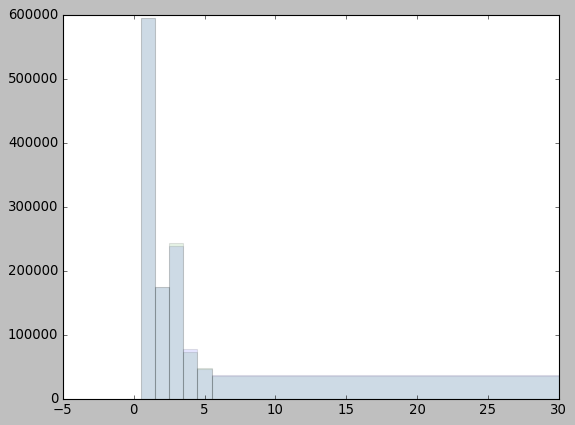

In [82]:
# read in and plot from the files
plt.clf()
runs=1
#pvals=range(2,11,2)
pvals=range(2,11,2)
fig, ax=plt.subplots(figsize=(6,4))
fig1, ax1=plt.subplots()
max_length=6
cm_subsection = np.linspace(0.2, 1, 5) 
colors = [ cm.Blues(x) for x in cm_subsection ]

ax.plot([], [], color='white',
        lw=3, label=r" ", alpha=0)

ax.plot([], [], color=marker_colors[0],
        lw=3, label=r"$p=$0.02")
ax.plot([], [], color=marker_colors[1],
        lw=3, label=r"$p=$0.05")
ax.plot([], [], color=marker_colors[2],
        lw=3, label=r"$p=$0.1")
for ii,p in enumerate(pvals):
    bins=list(range(max_length))
    bins.append(max_length)
    n=[]
    if p>=1:
        files=glob.glob("/Users/louisshekhtman/Documents/ethereum/ethereum/results/ieee-infocom2018/paths/exchnage_dist_all_exchanges/Exchange_dist*perc%d_*" % p)  
    print(len(files), p)
    for f,filestring in enumerate(files):
        print(p,f)
        filename=open(filestring)
        distances=[]
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                distances.append(int(dval))
        bins1=[-0.5+x for x in range(max_length+1)]
        bins1.append(30)
        n_run,bins_run,patches=ax1.hist(distances, bins=bins1, alpha=0.1)
        #bins_run=[(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]  
        n.append(n_run)
    n=np.array(n)
    n_final=np.average(n, axis=0)
    n_cumsum=np.cumsum(n_final)
    n_cumsum=n_cumsum/nodes[0]
    if p>=1:
        thislabel=r"$p=$%.1f" % (float(p)/(max(pvals)))
    else:
        thislabel=r"$p=$%.2f" % (float(p)/(max(pvals)))
    ax.plot(bins, n_cumsum, color=marker_colors[ii+3],lw=4,ls=linestyles[ii+3], label=thislabel)
    #plt.errorbar(p_run[::3], gcc_avg[::3], yerr=gcc_std[::3], linestyle='-', color=marker_colors[x], label=("" ), marker=markers[x] )
    print(p)
    print(list(zip(bins,n_cumsum)))

In [42]:
ax.legend(loc=(0.02,0.01), borderpad=0.1,numpoints=1,handletextpad=0.2, columnspacing=0.2, labelspacing=0.1, frameon=False, ncol=3, prop={'size':17})
ax.set_xticks(list(range(1,max_length+1)))
ax.set_xlim(left=1, right=max_length)
xticklabels=[str(x) for x in range(1,max_length)]
xticklabels.append(">%d" % max_length)
ax.set_xticklabels(xticklabels)
ax.set_ylim(bottom=0.)
ax.set_yticks(np.array(range(0,11,2))/10.)

'''ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')'''

#ax.text(1.34,0.94,"Blockchain Transactions",fontsize=18, fontweight='bold')
ax.tick_params(axis='both',labelsize=20)
#ax.set_ylim(bottom=10**4, top=10**6)
ax.set_xlabel(r"$l$", fontsize=48)
ax.set_ylabel(r"$S_l$", fontsize=48)
fig.tight_layout()
plt.show()
fig.savefig("paths_cumulative_ethereum_all-square-170423.pdf")

# PDF

100 2
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 79
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 87
2 88
2 89
2 90
2 91
2 92
2 93
2 94
2 95
2 96
2 97
2 98
2 99
2
[(0, 2.9400091140282537e-06), (1, 0.2183496993840681), (2, 0.28266037749717027), (3, 0.37122227203904334), (4, 0.3987278948064739), (5, 0.41584297411321974), (6, 0.42918620547723696)]
100 4
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
4 31
4 32
4 33
4 34
4 35
4 36
4 37
4 38
4 39
4 40
4 41
4 42
4 43
4 44
4 45
4 46
4 47
4 48
4 49
4 50
4 51
4 52
4 53
4 54
4 55
4 56
4 57
4 58
4 59
4 60
4 61
4 62
4 63
4 

<Figure size 640x480 with 0 Axes>

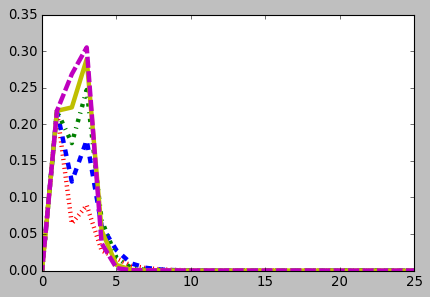

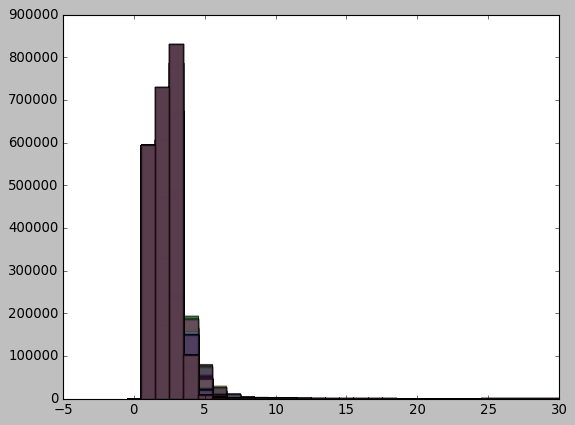

In [87]:
# read in and plot from the files
plt.clf()
runs=2
#pvals=range(2,11,2)
pvals=range(2,11,2)
fig, ax=plt.subplots(figsize=(6,4))
fig1, ax1=plt.subplots()
max_length=25
cm_subsection = np.linspace(0.2, 1, 5) 
colors = [ cm.Blues(x) for x in cm_subsection ]

'''ax.plot([], [], color='white',
        lw=3, label=r" ", alpha=0)'''

ax.plot([], [], color=marker_colors[0], ls=linestyles[0],
        lw=3, label=r"$p=$0.02")
ax.plot([], [], color=marker_colors[1], ls=linestyles[1],
        lw=3, label=r"$p=$0.05")
ax.plot([], [], color=marker_colors[2], ls=linestyles[2],
        lw=3, label=r"$p=$0.1")
for ii,p in enumerate(pvals):
    bins=list(range(max_length))
    bins.append(max_length)
    n=[]
    if p>=1:
        files=glob.glob("/Users/louisshekhtman/Documents/ethereum/ethereum/results/ieee-infocom2018/paths/exchnage_dist_all_exchanges/Exchange_dist*perc%d_*" % p)  
    print(len(files), p)
    for f,filestring in enumerate(files):
        print(p,f)
        filename=open(filestring)
        distances=[]
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                distances.append(int(dval))
        bins1=[-0.5+x for x in range(max_length+1)]
        bins1.append(30)
        n_run,bins_run,patches=ax1.hist(distances, bins=bins1, alpha=0.1)
        #bins_run=[(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]  
        n.append(n_run)
    n=np.array(n)
    n_final=np.average(n, axis=0)
    #n_cumsum=np.cumsum(n_final)
    n_final=n_final/nodes[0]
    if p>=1:
        thislabel=r"$p=$%.1f" % (float(p)/(max(pvals)))
    else:
        thislabel=r"$p=$%.2f" % (float(p)/(max(pvals)))
    ax.plot(bins, n_final, color=marker_colors[ii+3],lw=4, ls=linestyles[ii+3], label=thislabel)
    #plt.errorbar(p_run[::3], gcc_avg[::3], yerr=gcc_std[::3], linestyle='-', color=marker_colors[x], label=("" ), marker=markers[x] )
    print(p)
    print(list(zip(bins,n_cumsum)))

In [88]:
ax.legend(loc=(0.3,0.47), borderpad=0.2,numpoints=1,handletextpad=0.2, columnspacing=0.4, 
          labelspacing=0.1, frameon=False, ncol=2, prop={'size':18})
ax.set_xticks(list(range(1,max_length+1)))
ax.set_xlim(left=1, right=max_length)
xticklabels=[1,5,10,15,20]
#xticklabels.append(">%d" % max_length)
ax.set_xticks(xticklabels)
ax.set_xticklabels(xticklabels)
ax.set_ylim(bottom=0.)
ax.set_yticks(np.array(range(0,11,2))/10.)

'''ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')'''
ax.set_xlim(1,11)
ax.set_ylim(0,0.45)
#ax.text(1.34,0.94,"Blockchain Transactions",fontsize=18, fontweight='bold')
ax.tick_params(axis='both',labelsize=20)
#ax.set_ylim(bottom=10**4, top=10**6)
ax.set_xlabel(r"$l$", fontsize=48)
ax.set_ylabel(r"$F_l$", fontsize=48)
fig.tight_layout()
plt.show()
fig.savefig("paths_pdf_ethereum_all-square-170423.pdf")

# ER Compare to analytic

In [46]:
files=glob.glob("er_k5_N10000/")
perc_val_dists={perc:{} for perc in [2*k for k in range(6)]}
for f in files:
    node=int(f.split('node')[1].split('_')[0])
    perc=float(f.split('perc')[1].split('_')[0])
    if perc in perc_val_dists:
        filename=open(f)
        for line in filename.readlines():
            if len(line.split())>1:
                dval=line.split()[1]
                seeknode=int(line.split()[0])
                perc_val_dists[perc][(node, seeknode)]=int(dval)


IndexError: list index out of range

0.2 221 0.02 237.52
0.5 570 0.05 593.8000000000001
1 1166 0.1 1187.6000000000001
2 2401 0.2 2375.2000000000003
4 4758 0.4 4750.400000000001
10 11876 1.0 11876.0
[1.0, 0.4, 0.2, 0.1, 0.05, 0.02]
0.2 7846 0.0004 353.8576
0.5 46452 0.0025000000000000005 2211.6100000000006
1 149567 0.010000000000000002 8846.440000000002
2 347660 0.04000000000000001 35385.76000000001
4 618529 0.16000000000000003 141543.04000000004
10 884644 1.0 884644.0
[1.0, 0.16000000000000003, 0.04000000000000001, 0.010000000000000002, 0.0025000000000000005, 0.00039999999999999996]
0.2 98 8.000000000000001e-06 1.1516880000000003
0.5 2218 0.00012500000000000003 17.995125000000005
1 14024 0.0010000000000000002 143.96100000000004
2 57044 0.008000000000000002 1151.6880000000003
4 110388 0.06400000000000002 9213.504000000003
10 143961 1.0 143961.0
[1.0, 0.06400000000000002, 0.008000000000000002, 0.0010000000000000002, 0.00012500000000000003, 8.000000000000001e-06]
0.2 0 1.6e-07 1.904e-05
0.5 1 6.250000000000001e-06 0.00074375

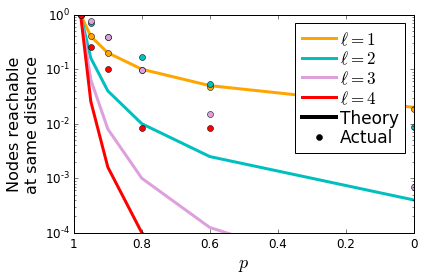

In [43]:
perc_vals=[0.2, 0.5,1,2,4,10]
for distval in range(1,5):
    have_distx=[pair[0] for pair in perc_val_dists[10].items() if pair[1]==distval]
    predicted_same_dist=[]
    actual_same_dist=[]
    for perc_val in [0.2, 0.5,1,2,4,10]:
        same_dist=[key for key in have_distx if perc_val_dists[perc_val][key]==distval]
        print(perc_val, len(same_dist), (perc_val/10)**distval,(perc_val/10)**distval*len(have_distx))
        actual_same_dist.append(len(same_dist))
        predicted_same_dist.append((perc_val/10)**distval*len(have_distx))
    perc_vals=[p/10 for p in [0.2, 0.5,1,2,4,10]]
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    maxval_pred=len(have_distx)
    predicted_same_dist=[v/maxval_pred for v in predicted_same_dist]
    make_val_act=len(have_distx)
    actual_same_dist=[v/make_val_act for v in actual_same_dist]
    plt.semilogy(perc_vals, predicted_same_dist, color=marker_colors[distval-1], lw=3, label='$\ell=%d$' % (distval))
    plt.semilogy(perc_vals, actual_same_dist, 'o',color=marker_colors[distval-1])
    print(predicted_same_dist)
plt.semilogy([],[], color='k', lw=4, label='Theory')
plt.semilogy([],[], 'o', color='k', lw=4, label='Actual')

plt.xlabel('$p$', fontsize=18)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0],labels=[1,0.8,0.6,0.4,0.2,0], fontsize=12)    
plt.ylabel('Nodes reachable\nat same distance', fontsize=16)
plt.yticks(fontsize=12)    
plt.ylim(10**-4,1)
plt.legend(loc='upper right', borderpad=0.4,numpoints=1,handletextpad=0.2, columnspacing=0.2, labelspacing=0.1, frameon=True, ncol=1, prop={'size':17})
plt.tight_layout()
plt.savefig('dacunha_num_nodes_reachable_at_same_dist_estimate_050922.pdf')

plt.show()

0.2 664 2.1429674859165817
0.5 3018 58.565667789207495
1 7167 512.9576214263998
2 8735 1997.096041064449
4 7042 3221.6708672657446
10 0 0.0
0.2 41584 5.3682626466479
0.5 228683 443.7698014260881
1 412511 5904.860091313677
2 424944 38862.23148593435
4 235738 86278.92609003036
10 0 0.0
0.2 1784 0.006909133725678039
0.5 19427 2.827423529177272
1 36294 77.9291917624519
2 33591 921.5952345560975
4 5275 1158.374131768939
10 0 0.0


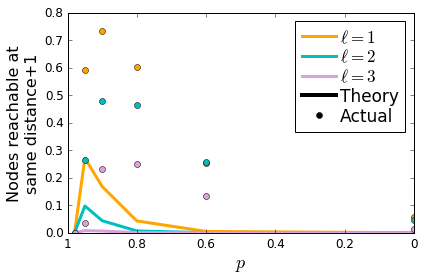

In [45]:
for distval in [1,2,3]:#range(1,5):
    have_distx=[pair[0] for pair in perc_val_dists[10].items() if pair[1]==distval]
    predicted_same_dist=[]
    actual_same_dist=[]
    for perc_val in [0.2, 0.5,1,2,4,10]:
        same_dist=[key for key in have_distx if perc_val_dists[perc_val][key]==distval+1]
        pval=perc_val/10
        ell=distval
        print(perc_val, len(same_dist), len(same_dist)*ell*pval**(ell-1)*(1-pval)*(1-(1-pval**2)**(0.85*9.7)))
        actual_same_dist.append(len(same_dist))
        predicted_same_dist.append(len(same_dist)*ell*pval**(ell-1)*(1-pval)*(1-(1-pval**2)**(0.85*9.7)))

    perc_vals=[p/10 for p in [0.2, 0.5,1,2,4,10]]
    predicted_same_dist.reverse()
    actual_same_dist.reverse()
    maxval_pred=len(have_distx)
    predicted_same_dist=[v/maxval_pred for v in predicted_same_dist]
    make_val_act=len(have_distx)
    actual_same_dist=[v/make_val_act for v in actual_same_dist]
    plt.plot(perc_vals, predicted_same_dist, color=marker_colors[distval-1], lw=3, label='$\ell=%d$' % (distval))
    plt.plot(perc_vals, actual_same_dist, 'o',color=marker_colors[distval-1])
plt.plot([],[], color='k', lw=4, label='Theory')
plt.plot([],[], 'o', color='k', lw=4, label='Actual')

plt.xlabel('$p$', fontsize=18)
plt.xticks([0,0.2,0.4,0.6,0.8,1],labels=[1,0.8,0.6,0.4,0.2,0], fontsize=12)    
plt.ylabel('Nodes reachable at\nsame distance+1', fontsize=16)
plt.yticks(fontsize=12)    

plt.legend(loc='upper right', borderpad=0.4,numpoints=1,handletextpad=0.2, columnspacing=0.2, labelspacing=0.1, frameon=True, ncol=1, prop={'size':17})
plt.tight_layout()
plt.savefig('dacunha_num_nodes_reachable_at_same_dist_plus1_estimate_050922.pdf')
plt.show()